## OpenCV DarkNet YOLO Object Detection

* Download weights file and config file from https://pjreddie.com/darknet/yolo/  
* YOLOv3-416 https://pjreddie.com/media/files/yolov3.weights
* YOLOv3-416 config https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg  
* YOLOv3-tiny https://pjreddie.com/media/files/yolov3-tiny.weights  
* YOLOv3-tiny config https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg

In [61]:
!pwd

D:\jupyter_dir\DLCV


In [62]:
# !mkdir pretrained
# %cd pretrained
# !mkdir yolo416
# %cd yolo416
# %cd D:/jupyter_dir/DLCV/Detection/yolo/pretrained/yolo416

# !echo "###download weights file###"
# !wget https://pjreddie.com/media/files/yolov3.weights    
#!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
    
# !echo "yoloy416"
# !ls
# %cd D:/jupyter_dir/DLCV/Detection/yolo/pretrained
# !mkdir yolo_tiny
#%cd D:/jupyter_dir/DLCV/Detection/yolo/pretrained/yolo_tiny

#!echo "###download weights file###"
#!wget  https://pjreddie.com/media/files/yolov3-tiny.weights    
# !wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3-tiny.cfg
# !ls

#### input image

image shape: (633, 806, 3)


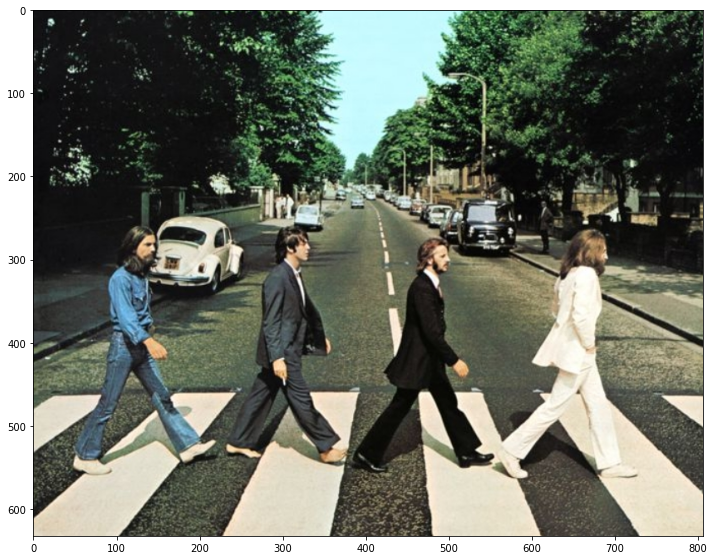

In [63]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('D:/jupyter_dir/DLCV/data/image/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### readNetFromDarknet(config, weight)  
load yolo inference network model

In [64]:
import os
%cd D:/jupyter_dir/DLCV/Detection/yolo/pretrained/yolo416

# use Absolute path
CUR_DIR = os.path.abspath('.')
weights_path = os.path.join(CUR_DIR, 'yolov3.weights') #str
config_path = os.path.join(CUR_DIR, 'yolov3.cfg')
weights_path = weights_path.replace('\\', '/')
config_path = config_path.replace('\\', '/')

D:\jupyter_dir\DLCV\Detection\yolo\pretrained\yolo416


In [65]:
#cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, 'D:/jupyter_dir/DLCV/Detection/yolo/pretrained/yolo416/yolov3.weights')
cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [66]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [67]:
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


#### ouput data from 3 scale output layer

In [68]:
# filtering output layer(13grid, 26grid, 52grid) from whole darknet layer
layer_names = cv_net_yolo.getLayerNames()
outlayer_names = [layer_names[i[0] - 1] for i in cv_net_yolo.getUnconnectedOutLayers()]
print(outlayer_names)

# we use 416 model so resize image to 416x416
cv_net_yolo.setInput(cv2.dnn.blobFromImage(img, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))

cv_out = cv_net_yolo.forward(outlayer_names)

green_color = (0, 255, 0)
red_color = (0, 0, 255)

['yolo_82', 'yolo_94', 'yolo_106']


In [69]:
import numpy as np

rows, cols = img.shape[:2]
conf_threshold = 0.5
nms_threshold = 0.4

class_ids = []
confidences = []
boxes = []

for ix, output in enumerate(cv_out):
    print('output shape:', output.shape)
    for jx, detection in enumerate(output):
        scores = detection[5:]
        class_id = np.argmax(scores) # 값 가장 큰 index return
        class_score = scores[class_id]
        
        if class_score > conf_threshold:
            print(f'ix: {ix}, jx: {jx}, class_id: {class_id}, class score: {class_score}')
            center_x = int(detection[0] * cols)
            center_y = int(detection[1] * rows)
            width = int(detection[2] * cols)
            height = int(detection[3] * rows)
            left = int(center_x - width/2)
            top = int(center_y - height/2)
            
            class_ids.append(class_id)
            confidences.append(float(class_score))
            boxes.append([left, top, width, height])
            

output shape: (507, 85)
ix: 0, jx: 316, class_id: 0, class score: 0.849956750869751
ix: 0, jx: 319, class_id: 0, class score: 0.9317017197608948
ix: 0, jx: 325, class_id: 0, class score: 0.7300978899002075
ix: 0, jx: 328, class_id: 0, class score: 0.9623238444328308
ix: 0, jx: 334, class_id: 0, class score: 0.9984486103057861
ix: 0, jx: 337, class_id: 0, class score: 0.9833526611328125
ix: 0, jx: 343, class_id: 0, class score: 0.997843325138092
ix: 0, jx: 346, class_id: 0, class score: 0.637531578540802
output shape: (2028, 85)
ix: 1, jx: 831, class_id: 2, class score: 0.8169965744018555
ix: 1, jx: 832, class_id: 2, class score: 0.7153814435005188
ix: 1, jx: 877, class_id: 2, class score: 0.7854183316230774
ix: 1, jx: 955, class_id: 2, class score: 0.8472687602043152
ix: 1, jx: 1199, class_id: 0, class score: 0.7259775400161743
ix: 1, jx: 1202, class_id: 0, class score: 0.9635840654373169
ix: 1, jx: 1259, class_id: 0, class score: 0.9701870679855347
ix: 1, jx: 1262, class_id: 0, class 

#### NMS

In [70]:
conf_threshold = 0.5
nms_threshold = 0.4 # IOU
idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

print(idxs)

[[ 4]
 [17]
 [ 6]
 [15]
 [30]
 [28]
 [24]
 [32]
 [11]
 [ 8]
 [34]
 [33]
 [25]
 [29]]


#### Visualize objects

person: 0.9984
person: 0.9984
person: 0.9978
person: 0.9878
car: 0.9504
car: 0.9412
car: 0.9077
car: 0.9064
car: 0.8473
car: 0.8170
person: 0.7641
car: 0.6900
car: 0.6332
car: 0.6154


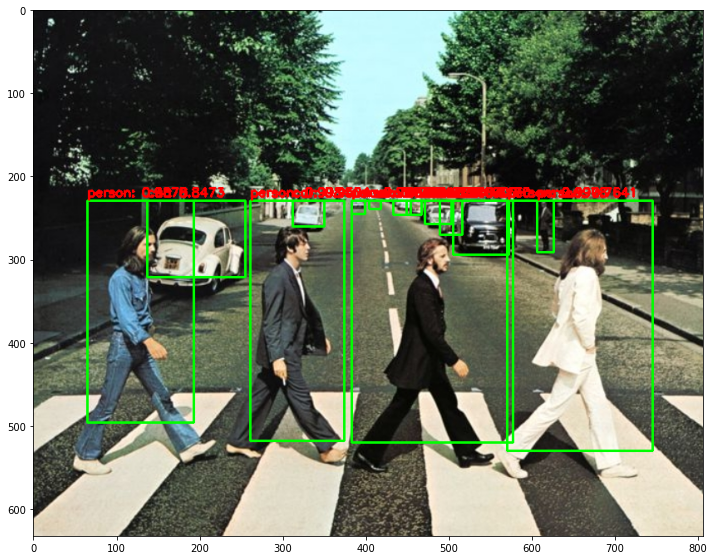

In [71]:
draw_img = img.copy()
if len(idxs) > 0:
    for i in idxs.flatten():
        box = boxes[i]
        left = box[0]
        right = box[1]
        width = box[2]
        height = box[3]
        
        caption = "{}: {:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
        cv2.rectangle(draw_img, (left, top, width, height), green_color, 2)
        cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 2)
        print(caption)

cv2.imwrite('D:\jupyter_dir\DLCV\data\output/beatles01_yolo.jpg', draw_img)
img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### Single image detection function

In [72]:
def get_detected_img(cv_net, img_array, conf_threshold, nms_threshold, use_copied_array=True, is_print=True):
    rows, cols= img_array.shape[:2]
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
        
    layer_names = cv_net.getLayerNames()
    outlayer_names = [layer_names[i[0] - 1] for i in cv_net.getUnconnectedOutLayers()]
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False))
    
    start=time.time()
    
    cv_outs = cv_net.forward(outlayer_names)
    layerOutputs = cv_net.forward(outlayer_names)
    
    green_color = (0, 255, 0)
    red_color = (0, 0, 255)
    
    class_ids = []
    confidences = []
    boxes = []
    
    for ix, output in enumerate(cv_outs):
        for jx, detection in enumerate(output):
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = float(scores[class_id])
            if confidence > conf_threshold:
                if is_print:
                    print(f'ix:{ix}, jx:{jx}, class_id:{class_id}, confidence:{confidence}')
                center_x = int(detection[0]*cols)
                center_y = int(detection[1]*rows)
                width = int(detection[2]*cols)
                height = int(detection[3]*rows)
                left = int(center_x - width/2)
                top = int(center_y - height/2)
                
                class_ids.append(class_id)
                confidences.append(confidence)
                boxes.append([left, top, width, height])
                
    #NMS
    idxs = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)
    if len(idxs)>0:
        for i in idxs.flatten():
            box = boxes[i]
            left = box[0]
            top = box[1]
            width = box[2]
            height = box[3]
            
            caption = "{}:{:.4f}".format(labels_to_names_seq[class_ids[i]], confidences[i])
            cv2.rectangle(draw_img, (left, top, width, height), green_color, 2)
            cv2.putText(draw_img, caption, (left, top-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
            
    if is_print:
        print('Detection time:', round(time.time()-start,2), 'sec')
    return draw_img

In [73]:
!pwd
%cd D:\jupyter_dir\DLCV

D:\jupyter_dir\DLCV\Detection\yolo\pretrained\yolo416
D:\jupyter_dir\DLCV


ix:0, jx:292, class_id:0, confidence:0.7452113032341003
ix:0, jx:355, class_id:2, confidence:0.9889316558837891
ix:0, jx:363, class_id:2, confidence:0.9966322779655457
ix:0, jx:364, class_id:2, confidence:0.9883607029914856
ix:0, jx:382, class_id:2, confidence:0.9829035401344299
ix:0, jx:385, class_id:2, confidence:0.9722945094108582
ix:0, jx:394, class_id:2, confidence:0.9831686019897461
ix:0, jx:421, class_id:2, confidence:0.9786350727081299
ix:0, jx:424, class_id:2, confidence:0.9792539477348328
ix:1, jx:1208, class_id:0, confidence:0.5535342693328857
ix:1, jx:1211, class_id:0, confidence:0.6975436210632324
ix:1, jx:1286, class_id:0, confidence:0.5021798610687256
ix:1, jx:1289, class_id:0, confidence:0.8685135245323181
ix:1, jx:1430, class_id:2, confidence:0.9298684597015381
ix:1, jx:1508, class_id:2, confidence:0.6600435376167297
ix:2, jx:5278, class_id:0, confidence:0.5077786445617676
ix:2, jx:5279, class_id:0, confidence:0.5872514247894287
Detection time: 2.81 sec


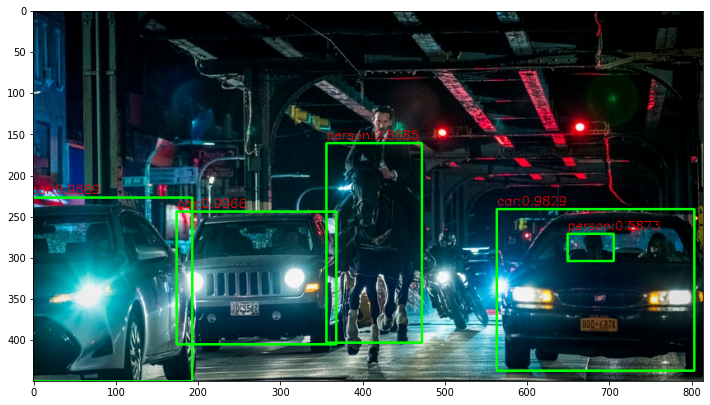

In [74]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import os
CUR_DIR = os.path.abspath('.')
img = cv2.imread(os.path.join(CUR_DIR, 'data/image/john_wick01.jpg'))

weights_path = (os.path.join(CUR_DIR, 'Detection/yolo/pretrained/yolo416/yolov3.weights')).replace('\\', '/')
config_path = (os.path.join(CUR_DIR, 'Detection/yolo/pretrained/yolo416/yolov3.cfg')).replace('\\', '/')

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

draw_img = get_detected_img(cv_net_yolo, img, 0.5, 0.4, True, True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### Video Object Detection

In [75]:
def do_detected_video(cv_net, input_path, output_path, conf_threshold, nms_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)
    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)
    
    codec = cv2.VideoWriter_fourcc(*'XVID')
    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)
    
    frame_cnt = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print('Total Frame count:', frame_cnt)
    
    green_color = (0, 255, 0)
    red_color = (0, 0, 255)
    
    while True:
        hasFrame,img_frame = cap.read()
        if not hasFrame:
            print('No more Frame!')
            break
        returned_frame = get_detected_img(cv_net, img_frame, conf_threshold, nms_threshold, False, is_print)
        vid_writer.write(returned_frame)
        
    cap.release()
    vid_writer.release()

In [76]:
input_path = 'D:/jupyter_dir/DLCV/data/video/John_Wick_small.mp4' 
output_path = 'D:/jupyter_dir/DLCV/data/output/John_Wick_small_yolov3.avi'
do_detected_video(cv_net_yolo, input_path, output_path, 0.5, 0.4, True)

Total Frame count: 58.0
ix:0, jx:250, class_id:0, confidence:0.5407641530036926
ix:0, jx:251, class_id:0, confidence:0.5710572004318237
ix:0, jx:290, class_id:0, confidence:0.5235307216644287
ix:1, jx:1019, class_id:2, confidence:0.5090051889419556
ix:1, jx:1022, class_id:2, confidence:0.5110524892807007
ix:1, jx:1100, class_id:2, confidence:0.5407771468162537
ix:1, jx:1166, class_id:2, confidence:0.5763546824455261
ix:1, jx:1227, class_id:2, confidence:0.5980678796768188
ix:1, jx:1230, class_id:2, confidence:0.8704732656478882
ix:1, jx:1232, class_id:2, confidence:0.822188675403595
ix:1, jx:1233, class_id:2, confidence:0.6267614960670471
ix:1, jx:1241, class_id:2, confidence:0.5191514492034912
ix:1, jx:1244, class_id:2, confidence:0.679490327835083
ix:1, jx:1305, class_id:2, confidence:0.5108705163002014
ix:1, jx:1310, class_id:2, confidence:0.8248258829116821
ix:1, jx:1322, class_id:2, confidence:0.531844973564148
Detection time: 2.69 sec
ix:0, jx:250, class_id:0, confidence:0.541063

ix:0, jx:238, class_id:2, confidence:0.7501271963119507
ix:0, jx:277, class_id:2, confidence:0.8554085493087769
ix:0, jx:285, class_id:2, confidence:0.9656462669372559
ix:0, jx:288, class_id:2, confidence:0.9742380380630493
ix:0, jx:316, class_id:2, confidence:0.5547229647636414
ix:1, jx:1110, class_id:2, confidence:0.6952767372131348
ix:1, jx:1113, class_id:2, confidence:0.5875519514083862
ix:1, jx:1121, class_id:2, confidence:0.8410117030143738
ix:1, jx:1124, class_id:2, confidence:0.8293140530586243
ix:1, jx:1134, class_id:0, confidence:0.6580066680908203
ix:1, jx:1163, class_id:2, confidence:0.7639443278312683
ix:1, jx:1166, class_id:2, confidence:0.8389449715614319
ix:1, jx:1241, class_id:2, confidence:0.945652961730957
ix:1, jx:1244, class_id:2, confidence:0.9725099802017212
ix:1, jx:1319, class_id:2, confidence:0.8190224766731262
ix:1, jx:1322, class_id:2, confidence:0.913012683391571
Detection time: 1.59 sec
ix:0, jx:238, class_id:5, confidence:0.6636605858802795
ix:0, jx:277, 

ix:0, jx:282, class_id:2, confidence:0.7368983626365662
ix:1, jx:1125, class_id:2, confidence:0.73555588722229
ix:1, jx:1178, class_id:2, confidence:0.5089803338050842
ix:1, jx:1203, class_id:2, confidence:0.765304446220398
ix:1, jx:1322, class_id:2, confidence:0.5315684080123901
ix:1, jx:1400, class_id:2, confidence:0.8288947343826294
ix:1, jx:1478, class_id:2, confidence:0.8857505917549133
ix:1, jx:1556, class_id:2, confidence:0.5776951313018799
Detection time: 1.62 sec
ix:0, jx:223, class_id:0, confidence:0.9357297420501709
ix:0, jx:259, class_id:0, confidence:0.514124870300293
ix:0, jx:262, class_id:0, confidence:0.9732632040977478
ix:0, jx:340, class_id:17, confidence:0.5262578129768372
ix:1, jx:1202, class_id:0, confidence:0.7038279175758362
ix:1, jx:1280, class_id:0, confidence:0.858005940914154
ix:1, jx:1358, class_id:0, confidence:0.6988734602928162
ix:1, jx:1565, class_id:2, confidence:0.8433452844619751
ix:1, jx:1590, class_id:3, confidence:0.7036820650100708
ix:1, jx:1592, 

ix:0, jx:259, class_id:0, confidence:0.5815486311912537
ix:0, jx:262, class_id:0, confidence:0.9411196708679199
ix:0, jx:301, class_id:0, confidence:0.813990592956543
ix:0, jx:346, class_id:2, confidence:0.5258651971817017
ix:0, jx:355, class_id:2, confidence:0.9433207511901855
ix:0, jx:385, class_id:2, confidence:0.884986937046051
ix:0, jx:394, class_id:2, confidence:0.9383854866027832
ix:1, jx:992, class_id:0, confidence:0.6412792205810547
ix:1, jx:1070, class_id:0, confidence:0.5033450126647949
ix:1, jx:1361, class_id:0, confidence:0.9554775953292847
ix:1, jx:1397, class_id:2, confidence:0.8509975671768188
ix:1, jx:1439, class_id:0, confidence:0.982017457485199
ix:1, jx:1475, class_id:2, confidence:0.8914571404457092
ix:1, jx:1490, class_id:2, confidence:0.690925121307373
ix:1, jx:1553, class_id:2, confidence:0.6779878735542297
ix:1, jx:1568, class_id:2, confidence:0.6806254982948303
ix:1, jx:1673, class_id:1, confidence:0.8347890377044678
ix:1, jx:1751, class_id:1, confidence:0.557

ix:0, jx:223, class_id:0, confidence:0.7943111658096313
ix:0, jx:259, class_id:0, confidence:0.9097899198532104
ix:0, jx:262, class_id:0, confidence:0.993966817855835
ix:0, jx:316, class_id:2, confidence:0.9623401165008545
ix:0, jx:340, class_id:17, confidence:0.6355118751525879
ix:0, jx:354, class_id:2, confidence:0.6430954933166504
ix:0, jx:355, class_id:2, confidence:0.9904145002365112
ix:0, jx:358, class_id:2, confidence:0.925287127494812
ix:0, jx:385, class_id:2, confidence:0.7224108576774597
ix:0, jx:394, class_id:2, confidence:0.944970428943634
ix:1, jx:1361, class_id:0, confidence:0.9364199042320251
ix:1, jx:1364, class_id:0, confidence:0.9806726574897766
ix:1, jx:1439, class_id:0, confidence:0.8585408329963684
ix:1, jx:1442, class_id:0, confidence:0.9619894027709961
ix:1, jx:1754, class_id:3, confidence:0.5462898015975952
ix:2, jx:3934, class_id:0, confidence:0.573097288608551
Detection time: 1.64 sec
ix:0, jx:223, class_id:0, confidence:0.5288941264152527
ix:0, jx:262, class_

ix:0, jx:223, class_id:0, confidence:0.7836750149726868
ix:0, jx:262, class_id:0, confidence:0.9256094098091125
ix:0, jx:279, class_id:2, confidence:0.9842830896377563
ix:0, jx:301, class_id:17, confidence:0.5897114872932434
ix:0, jx:318, class_id:2, confidence:0.9205940961837769
ix:0, jx:340, class_id:17, confidence:0.6833193898200989
ix:1, jx:1184, class_id:2, confidence:0.5849485993385315
ix:1, jx:1187, class_id:2, confidence:0.9765598177909851
ix:1, jx:1265, class_id:2, confidence:0.968385636806488
ix:1, jx:1331, class_id:2, confidence:0.663321852684021
ix:1, jx:1409, class_id:2, confidence:0.9469429850578308
ix:1, jx:1487, class_id:2, confidence:0.973038375377655
ix:1, jx:1490, class_id:2, confidence:0.7747911214828491
ix:1, jx:1565, class_id:2, confidence:0.9263148903846741
Detection time: 1.59 sec
ix:0, jx:223, class_id:0, confidence:0.7355586290359497
ix:0, jx:262, class_id:0, confidence:0.6164665818214417
ix:0, jx:279, class_id:2, confidence:0.9735158085823059
ix:0, jx:340, cl

## Object Detection with tiny yolo

ix:0, jx:325, class_id:0, confidence:0.5984022617340088
ix:0, jx:334, class_id:0, confidence:0.7680772542953491
ix:1, jx:810, class_id:2, confidence:0.6202420592308044
ix:1, jx:832, class_id:2, confidence:0.7915037870407104
Detection time: 0.99 sec


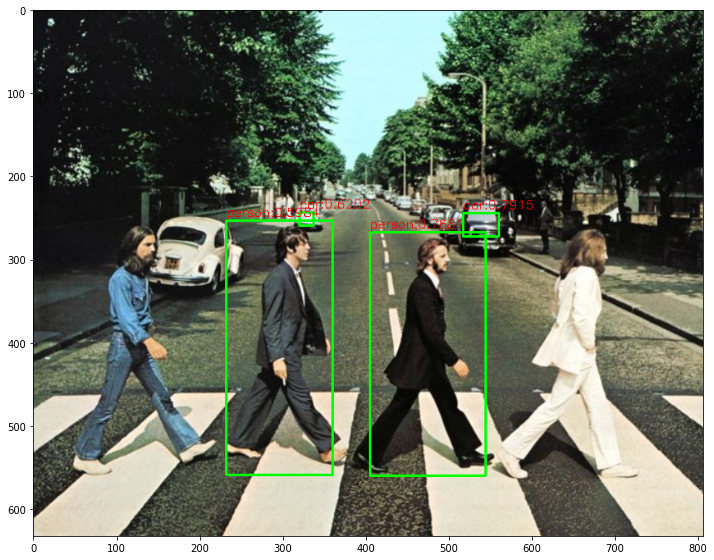

In [87]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('D:\jupyter_dir\DLCV\data\image/beatles01.jpg'.replace('\\', '/'))
weights_path = 'D:/jupyter_dir/DLCV/Detection/yolo/pretrained/yolo_tiny/yolov3-tiny.weights'
config_path = 'D:/jupyter_dir/DLCV/Detection/yolo/pretrained/yolo_tiny/yolov3-tiny.cfg'

cv_net_yolo = cv2.dnn.readNetFromDarknet(config_path, weights_path)

draw_img = get_detected_img(cv_net_yolo, image, 0.5, 0.4, True, True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

cv2.imwrite('D:/jupyter_dir/DLCV/data/output/beatles01_tiny_yolo.jpg', draw_img)
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

Very fast, but low performance

In [86]:
do_detected_video(cv_net_yolo, 'D:/jupyter_dir/DLCV/data/video/John_Wick_small.mp4', 'D:/jupyter_dir/DLCV/data/output/John_Wick_small_tiny_yolo.avi', 0.5, 0.4, True)


Total Frame count: 58.0
ix:1, jx:1309, class_id:2, confidence:0.6396779417991638
Detection time: 0.65 sec
ix:1, jx:1309, class_id:2, confidence:0.6376703381538391
Detection time: 0.29 sec
ix:0, jx:288, class_id:2, confidence:0.6188226938247681
ix:0, jx:306, class_id:2, confidence:0.590670645236969
ix:1, jx:1127, class_id:2, confidence:0.5167304873466492
Detection time: 0.18 sec
ix:0, jx:306, class_id:2, confidence:0.7568756341934204
Detection time: 0.17 sec
ix:0, jx:306, class_id:2, confidence:0.501930296421051
Detection time: 0.16 sec
ix:0, jx:288, class_id:2, confidence:0.724848747253418
ix:0, jx:306, class_id:2, confidence:0.5888756513595581
Detection time: 0.17 sec
ix:0, jx:288, class_id:2, confidence:0.7638890743255615
ix:0, jx:306, class_id:2, confidence:0.5926123857498169
Detection time: 0.23 sec
ix:0, jx:288, class_id:2, confidence:0.8025434613227844
Detection time: 0.2 sec
ix:0, jx:288, class_id:2, confidence:0.7506824731826782
ix:1, jx:1124, class_id:2, confidence:0.739073216